# Definition

In this methodology, we formulate the hypothesis in terms of a null hypothesis, H0, which represents the currently accepted state of knowledge, and an alternative hypothesis, HA, which represents a new claim that challenges the current state of knowledge. The null hypothesis and the alternative hypothesis must be mutually exclusive and complementary, so that one and only one of the hypotheses is true.

Once **H0** and **HA** are defined, the data that support the test must be collected, for example, through measurements, observations, or a survey. The next step is to find a test statistics that can be computed from the data and whose probability distribution function can be found under the null hypothesis. Next we can evaluate the data by computing the probability (the **p-value**) of obtaining the observed value of the test statistics (or a more extreme one) **using the distribution function that is implied by the null hypothesis**. **If the p-value is smaller than a predetermined threshold**, known as the significance level, and denoted by α (**typically 5% or 1%**), **we can conclude that the observed data is unlikely to have been described by the distribution corresponding to the null hypothesis**. In that case, we can therefore reject the null hypothesis in favor of the alternative hypothesis. The steps for carrying out a hypothesis test are summarized in the following list:

1.	
Formulate the null hypothesis and the alternative hypothesis.

 
2.	
Select a test statistics such that its sampling distribution under the null hypothesis is known (exactly or approximately).

 
3.	
Collect data.

 
4.	
Compute the test statistics from the data and calculate its p-value under the null hypothesis.

 
5.	
If the p-value is smaller than the predetermined significance level α, we reject the null hypothesis. If the p-value is larger, we fail to reject the null hypothesis.

Common Hypothesis Test Cases with the Corresponding Distributions and SciPy Functions
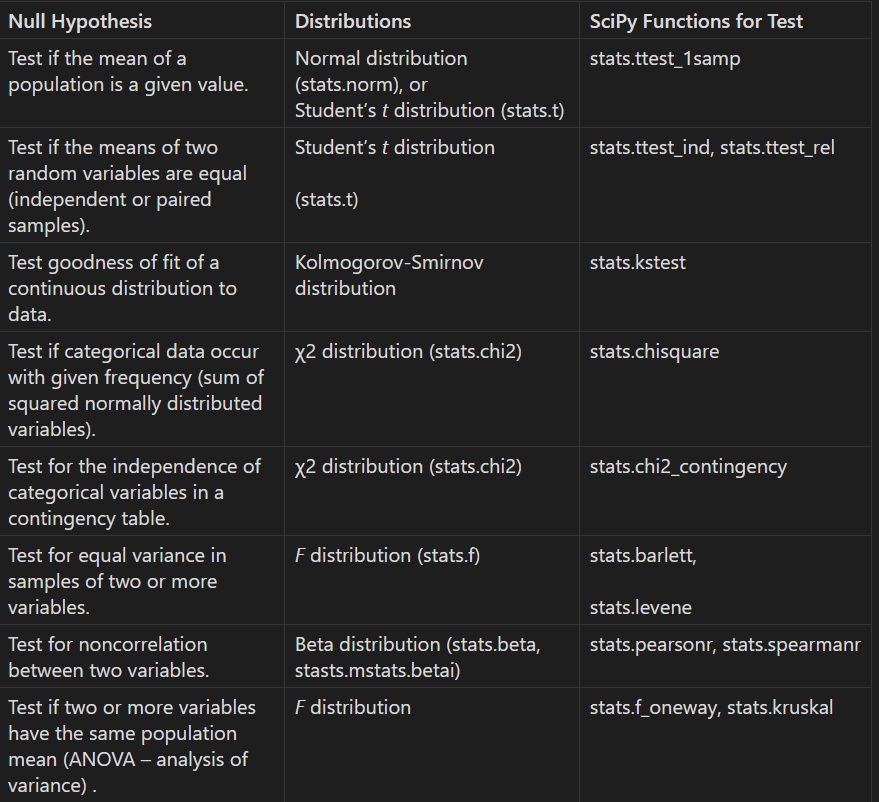

# Examples

### Importing Modules

In [1]:
# SciPy stats module
from scipy import stats
from scipy import optimize

# NumPy and the Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# statistical graphs and styling, we use the Seaborn
import seaborn as sns
sns.set(style="whitegrid")

## Example 1
Consider a null hypothesis that claims that a random variable X has mean μ0 = 1. Given samples of X, we then wish to test if the sampled data is compatible with the null hypothesis. Here we simulate the samples by drawing 100 random samples from a distribution slightly different than that claimed by the null hypothesis (using μ = 0.8):

In [2]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

Given the sample data, X_samples , next we need to compute a test statistic. If the **population standard deviation σ is known**, as in this example, we can use
$$z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$
, which is **normally distributed**.

In [3]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.633885368077972

If the **population variance is not known**, we can use the sample **standard deviation** instead:
$$t = \frac{\bar{x} - \mu}{\frac{\sigma_x}{\sqrt{n}}}$$
distribution instead **rather than the normal distribution**. To compute t in this case, we can use the NumPy method std with the ddof=1 argument to compute the sample standard deviation:

In [4]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-5.303827146879081

we can compare with the corresponding distribution to obtain a p-value. For example, for a normal distribution, we can use a stats.norm instance to represent a normal distributed random variable, and with its ppf method, we can look up the statistics value that corresponds to a certain significance level. For a two-sided hypothesis test of significance level 5.56% (2.78% on each side), the statistics threshold is

In [5]:
stats.norm().ppf(0.0556)

-1.5928225717339615

Since the observed statistics is about -2.79, which is smaller than the threshold value –1.59 for a two-sided test with significance level 5.56%, we have sufficient grounds to reject the null hypothesis in this case. We can explicitly compute the p-value for the observed test statistics using the cdf method (multiplied by two for a two-sided test). The resulting p-value is indeed rather small, which supports the rejection of the null hypothesis:

In [6]:
2 * stats.norm().cdf(-abs(z))

3.5886576279554034e-06

If we would like to use the t distribution, we can use the stats.t class instead of stats.norm. After computing the sample mean, $$\bar{x}$$ , only n − 1 degrees of freedom (df) remains in the sample data. The number of degrees of freedom is an important parameter for the t distribution, which we need to specify when we create the random variable instance:

In [7]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

6.92003285561803e-07

The p-value is again very small, suggesting that we should reject the null hypothesis.

In [8]:
t, p = stats.ttest_1samp(X_samples, mu)
t

-0.7255290444562463

In [9]:
p

0.469839131988557

High p-values ​​(such as 0.23): Indicate that the observed data are fairly consistent with the null hypothesis. In this case, there is not enough evidence to reject the null hypothesis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


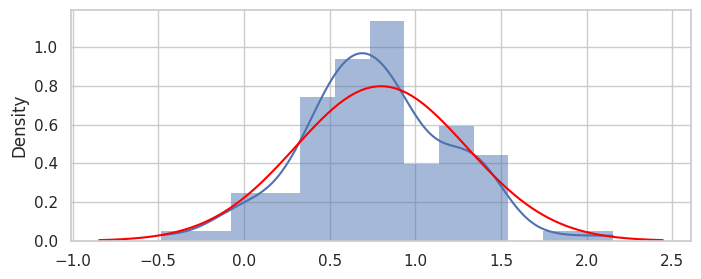

In [10]:
# Distribution function according to the null hypothesis (red) and the sample estimated distribution function (dark blue)
fig, ax = plt.subplots(figsize=(8, 3))
sns.histplot(X_samples, kde=True, ax=ax, stat="density", linewidth=0)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x), color='red')

## Example 2
Consider a two-variable problem, where the null hypothesis states that the population means of two random variables are equal (e.g., corresponding to independent subjects with and without treatment). We can simulate this type of test by creating two random variables with normal distribution, with a randomly chosen population means. Here we select 50 samples for each random variable.

In [11]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

We are interested in evaluating if the observed samples provide sufficient evidence that the two population means are not equal (rejecting the null hypothesis). For this situation, we can use the t test for two independent samples, which is available in SciPy stats.ttext_ind, which returns the test statistics and the corresponding p-value:

In [12]:
t, p = stats.ttest_ind(X1_sample, X2_sample)
t

3.235952195166323

In [13]:
p

0.0016539949763021778

Here the p-value is about 0.7449, which is not small enough to support rejecting the null hypothesis that the two means are different. In this example the two population means are indeed different:

In [14]:
mu1, mu2

(0.6575718153164861, 0.004121069243455344)

However, the particular samples drawn from these distributions did not statistically prove that these means are different (an error of type I). To increase the power of the statistical test, we would need to increase the number of samples from each random variable.